In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [102]:
candidates = {
    'chr5:87925915-87926842:+': 'Csn1s2a',
    'chr5:87817372-87821139:-': 'Csn1s1',
    'chr9:22555041-22570441:+': 'Bbs9'
}

In [103]:
df = pd.read_csv('dea/sum.tsv', sep='\t', index_col=0)
df = df.loc[candidates.keys()]
df.index = [candidates[i] for i in df.index]
df

,antiHormonal_18m_CYP19A1_no_3,aging_24m_CYP19A1_12m_2,antiHormonal_20m_ESR1_tamoxifen_2m_3,aging_30m_ESR1_18m_1,aging_18m_CYP19A1_1w_2,antiHormonal_20m_CYP19A1_tamoxifen_2m_1,aging_24m_ESR1_no_3,aging_24m_CYP19A1_12m_1,antiHormonal_20m_ESR1_letrozole_2m_2,aging_24m_ESR1_12m_3,...,aging_30m_ESR1_18m_3,aging_18m_ESR1_no_3,aging_18m_CYP19A1_1w_3,antiHormonal_20m_ESR1_tamoxifen_2m_2,aging_24m_CYP19A1_no_1,antiHormonal_20m_ESR1_letrozole_2m_1,antiHormonal_18m_CYP19A1_no_1,antiHormonal_20m_CYP19A1_no_3,antiHormonal_20m_ESR1_no_2,aging_12m_CYP19A1_1w_1
Csn1s2a,572,336,0,0,0,0,0,0,0,216,...,156,1404,68,0,0,0,0,0,184,0
Csn1s1,10,5,0,0,0,0,0,0,0,10,...,60,1775,175,355,15,0,0,0,3655,0
Bbs9,0,0,0,0,8,0,8,0,0,0,...,24,24,24,0,0,0,0,0,0,44


In [104]:
df_pheno = pd.read_csv('dea/phenotype.csv', index_col=0)
df_pheno = df_pheno.loc[df.columns]
df_pheno

,condition,age,transgene,induction,drug,replicate
antiHormonal_18m_CYP19A1_no_3,18_CYP19A1_24_no,18,CYP19A1,24,no,3
aging_24m_CYP19A1_12m_2,24_CYP19A1_48_no,24,CYP19A1,48,no,2
antiHormonal_20m_ESR1_tamoxifen_2m_3,20_ESR1_32_tamoxifen,20,ESR1,32,tamoxifen,3
aging_30m_ESR1_18m_1,30_ESR1_72_no,30,ESR1,72,no,1
aging_18m_CYP19A1_1w_2,18_CYP19A1_1_no,18,CYP19A1,1,no,2
...,...,...,...,...,...,...
antiHormonal_20m_ESR1_letrozole_2m_1,20_ESR1_32_letrozole,20,ESR1,32,letrozole,1
antiHormonal_18m_CYP19A1_no_1,18_CYP19A1_24_no,18,CYP19A1,24,no,1
antiHormonal_20m_CYP19A1_no_3,20_CYP19A1_32_no,20,CYP19A1,32,no,3
antiHormonal_20m_ESR1_no_2,20_ESR1_32_no,20,ESR1,32,no,2


In [105]:
df_pheno['induction'].max()

np.int64(72)

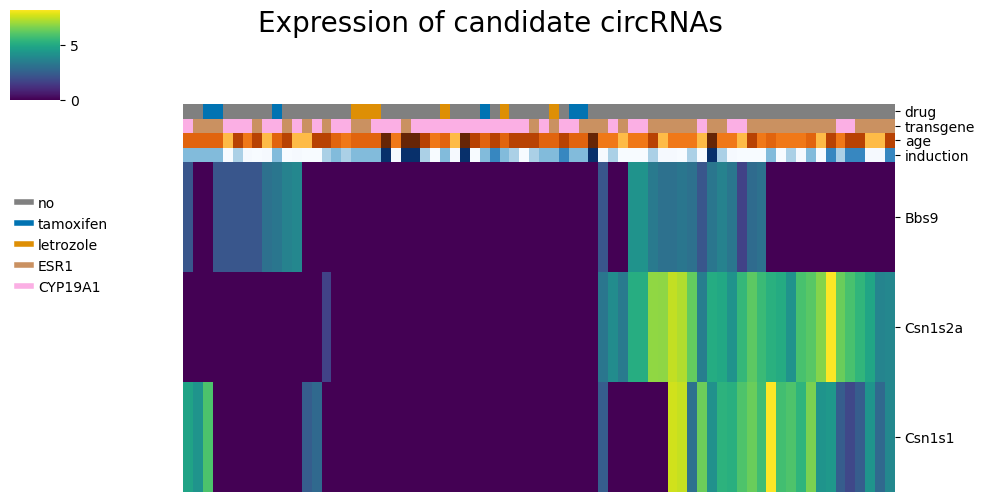

In [129]:
df_coloring = pd.DataFrame(index=df_pheno.index)

palette = sns.color_palette('colorblind')

drug_colors = {'no': 'gray', 'tamoxifen': palette[0], 'letrozole': palette[1]}
transgene_colors = {'ESR1': palette[5], 'CYP19A1': palette[6]}

df_coloring['drug'] = df_pheno['drug'].map(drug_colors)
df_coloring['transgene'] = df_pheno['transgene'].map(transgene_colors)

df_coloring['age'] = df_pheno['age'].map(lambda x: sns.color_palette('YlOrBr', as_cmap=True)(x / 30))
df_coloring['induction'] = df_pheno['induction'].map(lambda x: sns.color_palette("Blues", as_cmap=True)(x / 72))

g = sns.clustermap(np.log1p(df), col_colors=df_coloring, cmap='viridis', xticklabels=False)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)

# Add legend to bottom left
legend = [
    plt.Line2D([0], [0], color=drug_colors['no'], lw=4, label='no'),
    plt.Line2D([0], [0], color=drug_colors['tamoxifen'], lw=4, label='tamoxifen'),
    plt.Line2D([0], [0], color=drug_colors['letrozole'], lw=4, label='letrozole'),
    plt.Line2D([0], [0], color=transgene_colors['ESR1'], lw=4, label='ESR1'),
    plt.Line2D([0], [0], color=transgene_colors['CYP19A1'], lw=4, label='CYP19A1'),
]
plt.legend(handles=legend, loc='upper left', bbox_to_anchor=(0, -1))
plt.gcf().set_size_inches(10, 5)
g.figure.suptitle('Expression of candidate circRNAs', fontsize=20)
plt.savefig('../chapters/4_results_and_discussion/figures/heatmap.png', bbox_inches='tight')
